In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

def convert_to_csv(filename):
  data = pd.read_csv(filename, delimiter=',')
  return data

import sys
import os
prefix = '/content/sample_data'
customized_path_to_your_homework = ''
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)

data = convert_to_csv(os.path.join(sys_path, 'aapl.us.txt'))
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
# Set the device to 'cuda:0' if a GPU is available, otherwise use the CPU.
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

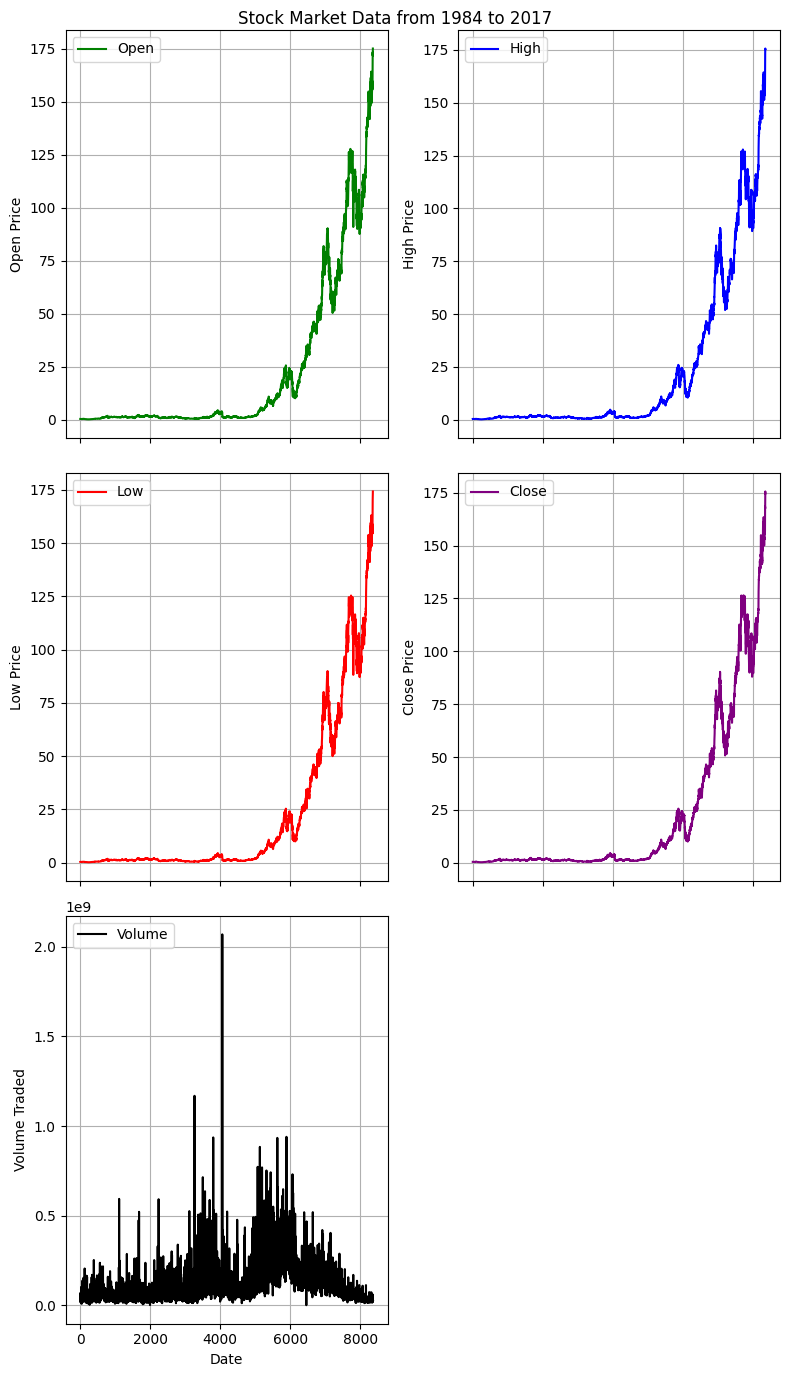

In [268]:
fig, axs = plt.subplots(3, 2, figsize=(8, 14), sharex=True)

# Plotting the 'Open' price
axs[0, 0].plot(data.index, data['Open'], label='Open', color='green')
axs[0, 0].set_ylabel('Open Price')
axs[0, 0].legend(loc='upper left')
axs[0, 0].grid(True)

# Plotting the 'High' price
axs[0, 1].plot(data.index, data['High'], label='High', color='blue')
axs[0, 1].set_ylabel('High Price')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(True)

# Plotting the 'Low' price
axs[1, 0].plot(data.index, data['Low'], label='Low', color='red')
axs[1, 0].set_ylabel('Low Price')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(True)

# Plotting the 'Close' price
axs[1, 1].plot(data.index, data['Close'], label='Close', color='purple')
axs[1, 1].set_ylabel('Close Price')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(True)

# Plotting the 'Volume'
axs[2, 0].plot(data.index, data['Volume'], label='Volume', color='black')
axs[2, 0].set_ylabel('Volume Traded')
axs[2, 0].legend(loc='upper left')
axs[2, 0].grid(True)

# Remove the unused subplot (bottom right)
fig.delaxes(axs[2, 1])

plt.xlabel('Date')  # Setting the common x-axis label
plt.suptitle('Stock Market Data from 1984 to 2017')  # Adding a title to the entire plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [269]:
data = data[['Date', 'Open', 'High', 'Low', 'Close']]
data

,Date,Open,High,Low,Close
0,1984-09-07,0.42388,0.42902,0.41874,0.42388
1,1984-09-10,0.42388,0.42516,0.41366,0.42134
2,1984-09-11,0.42516,0.43668,0.42516,0.42902
3,1984-09-12,0.42902,0.43157,0.41618,0.41618
4,1984-09-13,0.43927,0.44052,0.43927,0.43927
...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000


In [270]:
def shift_df(data, n_steps, features):
    df = data.copy()
    df.set_index('Date', inplace=True)

    # DataFrame to store shifted data
    shifted_data = pd.DataFrame(index=df.index)

    # Add columns for output Y (the current day's features)
    for col in features:
        shifted_data[col] = df[col]  # No shift for current day

    # Create shifted columns for each feature for input X
    # Starting from the oldest to the most recent (t-7 to t-1)
    for i in range(n_steps, 0, -1):
        for col in features:
            shifted_data[f'{col}(t-{i})'] = df[col].shift(i)

    # Drop rows with NaN values which are the result of shifting
    shifted_data.dropna(inplace=True)
    return shifted_data

# Define the lookback period
lookback = 7

# Define the columns we want
feature_names = ['Open', 'High', 'Low', 'Close']

# Number of features
num_features = len(feature_names)

# Generate the shifted DataFrame
shifted_df = shift_df(data, lookback, feature_names)

# Display the first few rows of the shifted DataFrame to verify the order
shifted_df.head()

,Open,High,Low,Close,Open(t-7),High(t-7),Low(t-7),Close(t-7),Open(t-6),High(t-6),...,Low(t-3),Close(t-3),Open(t-2),High(t-2),Low(t-2),Close(t-2),Open(t-1),High(t-1),Low(t-1),Close(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
1984-09-18,0.45718,0.46103,0.44052,0.44052,0.42388,0.42902,0.41874,0.42388,0.42388,0.42516,...,0.43927,0.43927,0.44052,0.45589,0.44052,0.44566,0.45718,0.46357,0.45718,0.45718
1984-09-19,0.44052,0.44566,0.43157,0.43157,0.42388,0.42516,0.41366,0.42134,0.42516,0.43668,...,0.44052,0.44566,0.45718,0.46357,0.45718,0.45718,0.45718,0.46103,0.44052,0.44052
1984-09-20,0.43286,0.43668,0.43286,0.43286,0.42516,0.43668,0.42516,0.42902,0.42902,0.43157,...,0.45718,0.45718,0.45718,0.46103,0.44052,0.44052,0.44052,0.44566,0.43157,0.43157
1984-09-21,0.43286,0.44566,0.42388,0.42902,0.42902,0.43157,0.41618,0.41618,0.43927,0.44052,...,0.44052,0.44052,0.44052,0.44566,0.43157,0.43157,0.43286,0.43668,0.43286,0.43286
1984-09-24,0.42902,0.43157,0.42516,0.42516,0.43927,0.44052,0.43927,0.43927,0.44052,0.45589,...,0.43157,0.43157,0.43286,0.43668,0.43286,0.43286,0.43286,0.44566,0.42388,0.42902


In [271]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale the features to a range of (-1, 1)
scaler = MinMaxScaler(feature_range=(-1,1))

# Convert DataFrame to NumPy array for easier manipulation and scaling
shifted_df_as_np = shifted_df.to_numpy()

# Apply the scaler to the data array to normalize the features
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99743671, -0.99742961, -0.99758664, ..., -0.99740065,
        -0.99738678, -0.99741509],
       [-0.99762725, -0.9976049 , -0.99768949, ..., -0.99742961,
        -0.99757885, -0.99760508],
       [-0.99771485, -0.9977073 , -0.99767467, ..., -0.9976049 ,
        -0.99768203, -0.99770714],
       ...,
       [ 0.98764846,  1.        ,  0.99356468, ...,  0.98745541,
         0.99515793,  0.98369251],
       [ 0.99279493,  0.99828937,  0.97988962, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.99737704,  1.        , ...,  0.99828937,
         0.9862808 ,  0.99589462]])

In [272]:
# Split the features and labels from the scaled data
X = shifted_df_as_np[:, num_features:]
Y = shifted_df_as_np[:, :num_features]

X.shape, Y.shape, X, Y


((8357, 28),
 (8357, 4),
 array([[-0.99774202, -0.99771276, -0.99773366, ..., -0.99740065,
         -0.99738678, -0.99741509],
        [-0.99774202, -0.99775841, -0.99779483, ..., -0.99742961,
         -0.99757885, -0.99760508],
        [-0.99772687, -0.99762216, -0.99765637, ..., -0.9976049 ,
         -0.99768203, -0.99770714],
        ...,
        [ 0.9294787 ,  0.97800045,  0.96135079, ...,  0.98745541,
          0.99515793,  0.98369251],
        [ 0.97680843,  0.99656996,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  0.98410687, ...,  0.99828937,
          0.9862808 ,  0.99589462]]),
 array([[-0.99743671, -0.99742961, -0.99758664, -0.99760508],
        [-0.99762725, -0.9976049 , -0.99768949, -0.99770714],
        [-0.99771485, -0.9977073 , -0.99767467, -0.99769243],
        ...,
        [ 0.98764846,  1.        ,  0.99356468,  1.        ],
        [ 0.99279493,  0.99828937,  0.97988962,  0.99589462],
        [ 1.        ,  0.

In [273]:
# Define the split index at 95% of the data for training
split_index = int(len(X) * 0.95)

# Split the data into training and testing datasets based on the split index
X_train = X[:split_index]
X_test = X[split_index:]

Y_train = Y[:split_index]
Y_test = Y[split_index:]

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((7939, 28), (418, 28), (7939, 4), (418, 4))

In [274]:
# Reshape the data to fit the model input (batch, sequence, features)
X_train = X_train.reshape((-1, lookback, num_features))
X_test = X_test.reshape((-1, lookback, num_features))

Y_train = Y_train.reshape((-1, num_features))
Y_test = Y_test.reshape((-1, num_features))

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7939, 7, 4), (418, 7, 4), (7939, 4), (418, 4))

In [275]:
# Convert the NumPy arrays to PyTorch tensors with appropriate data type
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([7939, 7, 4]),
 torch.Size([418, 7, 4]),
 torch.Size([7939, 4]),
 torch.Size([418, 4]))

In [276]:
from torch.utils.data import Dataset

# Define a custom dataset class for time series data
class TimeSeriesDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.Y[i]

# Create dataset objects for training and testing sets
train_dataset = TimeSeriesDataset(X_train, Y_train)
test_dataset = TimeSeriesDataset(X_test, Y_test)

In [277]:
from torch.utils.data import DataLoader

# Define the batch size for training and testing
batch_size = 16

# Create DataLoader objects for the training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [278]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 4]) torch.Size([16, 4])


In [279]:
class LSTM(nn.Module):
    def __init__(self, num_features, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(num_features, hidden_size, num_stacked_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, num_features)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(num_features, 12, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(4, 12, batch_first=True)
  (fc): Linear(in_features=12, out_features=4, bias=True)
)

In [280]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0

    print()

In [281]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [282]:
learning_rate = 0.001
num_epochs = 30
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.380
Batch 200, Loss: 0.012
Batch 300, Loss: 0.004
Batch 400, Loss: 0.003

Val Loss: 0.133
***************************************************

Epoch: 2
Batch 100, Loss: 0.002
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001
Batch 400, Loss: 0.001

Val Loss: 0.089
***************************************************

Epoch: 3
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000

Val Loss: 0.065
***************************************************

Epoch: 4
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000

Val Loss: 0.053
***************************************************

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000

Val Loss: 0.047
***************************************************

Epoch: 6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000

Val Loss: 0.041
***************************

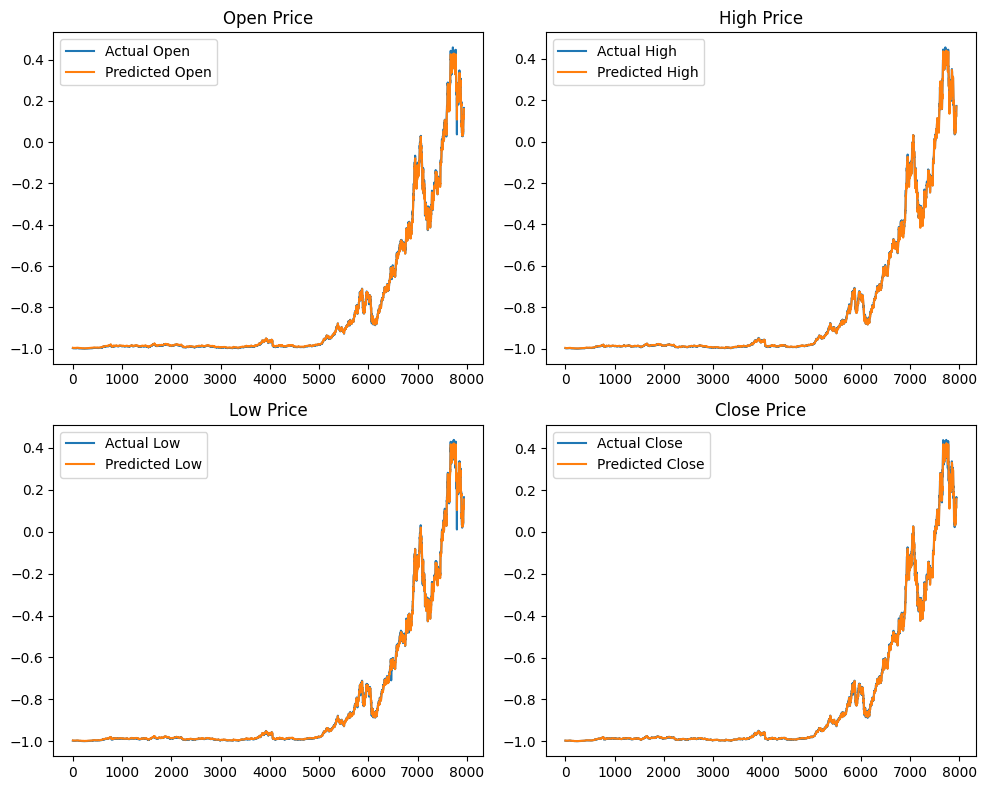

In [283]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

# Extract predictions for each feature
predicted_open = predicted[:, 0]
predicted_high = predicted[:, 1]
predicted_low = predicted[:, 2]
predicted_close = predicted[:, 3]

# Extract actual values for each feature
actual_open = Y_train[:, 0]
actual_high = Y_train[:, 1]
actual_low = Y_train[:, 2]
actual_close = Y_train[:, 3]

# Plot each feature in a separate subplot
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(actual_open, label='Actual Open')
plt.plot(predicted_open, label='Predicted Open')
plt.title('Open Price')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(actual_high, label='Actual High')
plt.plot(predicted_high, label='Predicted High')
plt.title('High Price')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(actual_low, label='Actual Low')
plt.plot(predicted_low, label='Predicted Low')
plt.title('Low Price')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(actual_close, label='Actual Close')
plt.plot(predicted_close, label='Predicted Close')
plt.title('Close Price')
plt.legend()

plt.tight_layout()
plt.show()



In [284]:
train_predictions = predicted.reshape(-1, num_features)

dummies = np.zeros((X_train.shape[0], (lookback + 1) * num_features))

dummies[:, :num_features] = train_predictions

dummies = scaler.inverse_transform(dummies)

train_predictions = dummies[:, :num_features:].copy()

train_predictions

array([[  0.61735323,   0.56178277,   0.551551  ,   0.4897133 ],
       [  0.61631088,   0.56265038,   0.55084559,   0.48947288],
       [  0.60869132,   0.55731929,   0.54340775,   0.48285585],
       ...,
       [ 98.80059089,  99.7743487 ,  97.80905897,  99.01590165],
       [100.53910072, 101.59244661,  99.57508139, 100.72525472],
       [101.65355428, 102.79056305, 100.67705451, 101.81540135]])

In [285]:
Y_train = Y_train.reshape(-1, num_features)
dummies = np.zeros((Y_train.shape[0], (lookback + 1) * num_features))
dummies[:, :num_features] = Y_train
dummies = scaler.inverse_transform(dummies)
new_y_train = dummies[:, :num_features:].copy()
new_y_train

array([[  0.45718085,   0.46103031,   0.44051758,   0.44051945],
       [  0.44051892,   0.44565899,   0.43157038,   0.43157131],
       [  0.43285766,   0.43667975,   0.43286189,   0.43286231],
       ...,
       [100.62999997, 101.80999969, 100.52000008, 101.24000002],
       [101.27000024, 102.89999944, 101.2500006 , 102.57000065],
       [102.13999978, 103.06000022, 101.59000058, 102.41000042]])

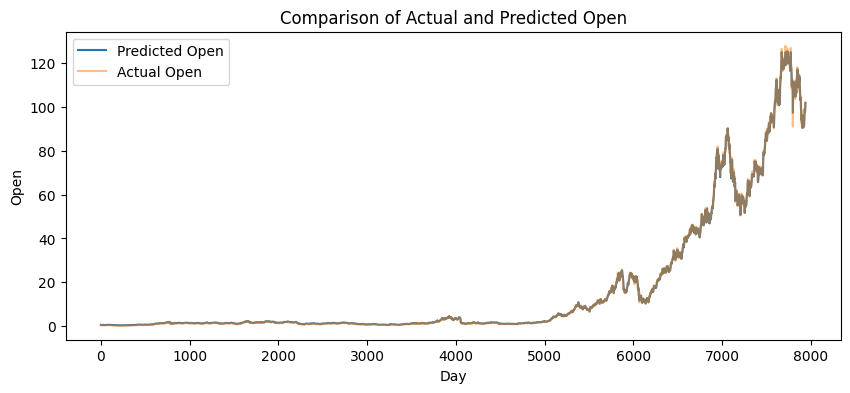

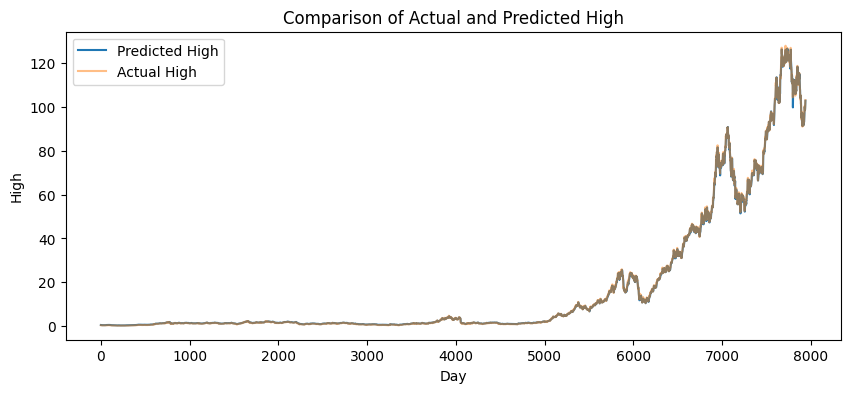

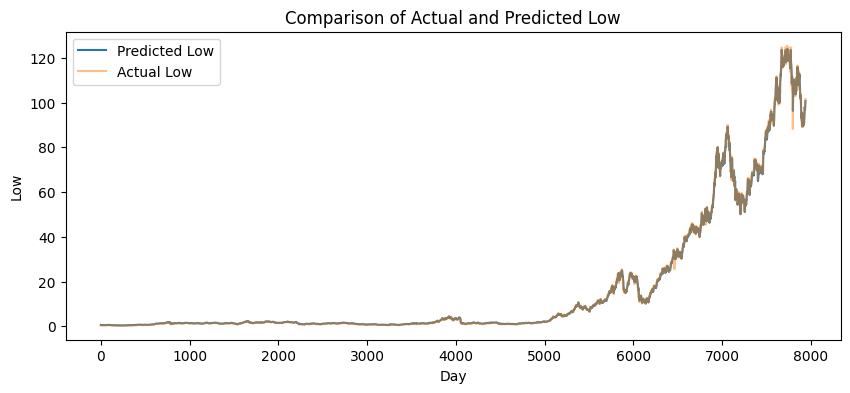

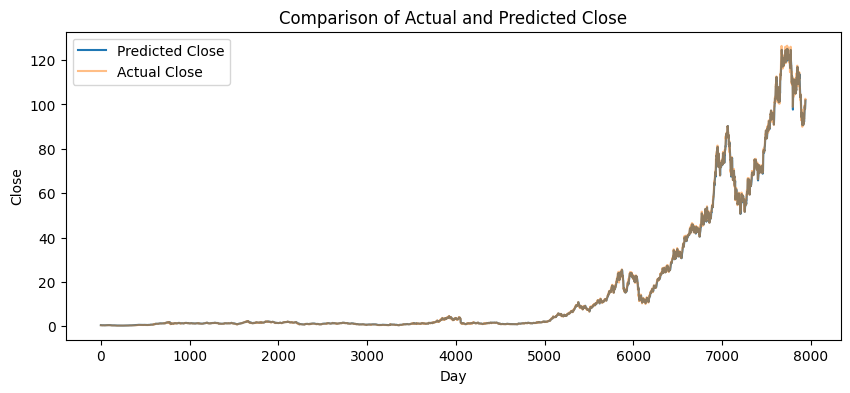

In [286]:


# Create separate plots for each feature.
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(10, 4))
    plt.plot(train_predictions[:, i], label=f'Predicted {feature}')
    plt.plot(new_y_train[:, i], label=f'Actual {feature}', alpha=0.5)
    plt.title(f'Comparison of Actual and Predicted {feature}')
    plt.xlabel('Day')
    plt.ylabel(feature)
    plt.legend()
    plt.show()


In [287]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten().reshape(-1, num_features)

dummies = np.zeros((X_test.shape[0], (lookback+1) * num_features))

dummies[:, :num_features] = test_predictions

dummies = scaler.inverse_transform(dummies)

test_predictions = dummies[:, :num_features].copy()
test_predictions.shape, Y_test.shape

((418, 4), torch.Size([418, 4]))

In [288]:
Y_test = Y_test.reshape(-1, num_features)
print(Y_test.shape)
dummies = np.zeros((Y_test.shape[0], (lookback + 1) * num_features))
dummies[:, :num_features] = Y_test
dummies = scaler.inverse_transform(dummies)
new_y_test = dummies[:, :num_features:].copy()
new_y_test

torch.Size([418, 4])


array([[102.93000043, 103.08999939, 101.8200006 , 102.53000059],
       [102.53999947, 104.20999962, 101.77000003, 102.52000058],
       [101.88000044, 103.8600002 , 101.83999953, 103.30000041],
       ...,
       [174.03000255, 175.61      , 173.70999882, 175.61      ],
       [174.47999975, 175.45999764, 172.52000084, 175.24999948],
       [175.11      , 175.37999986, 174.27      , 174.67000124]])

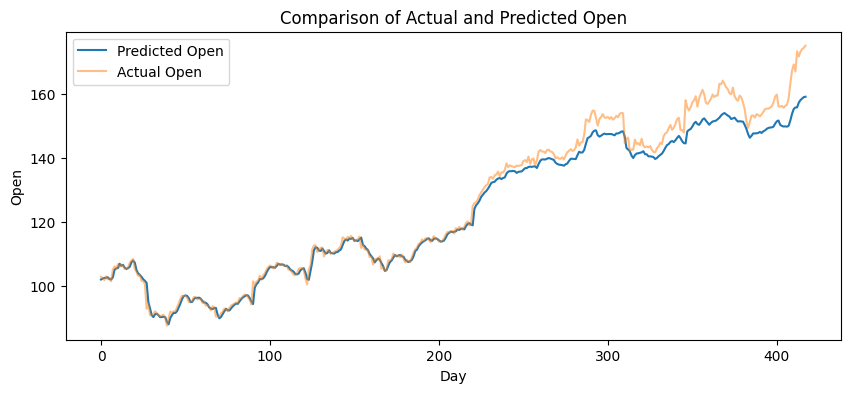

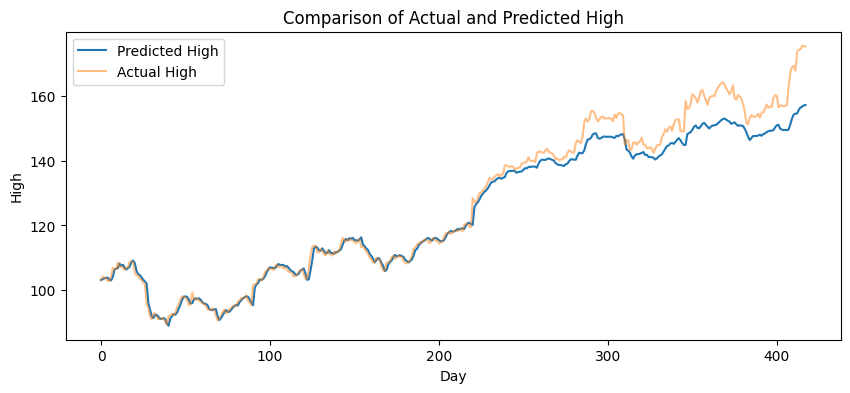

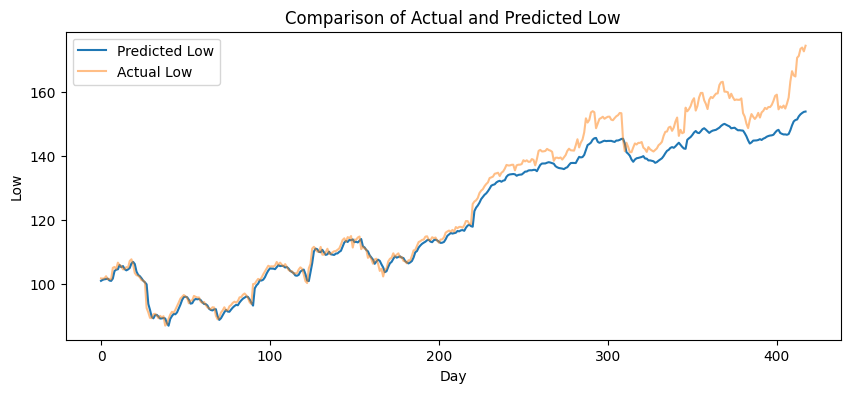

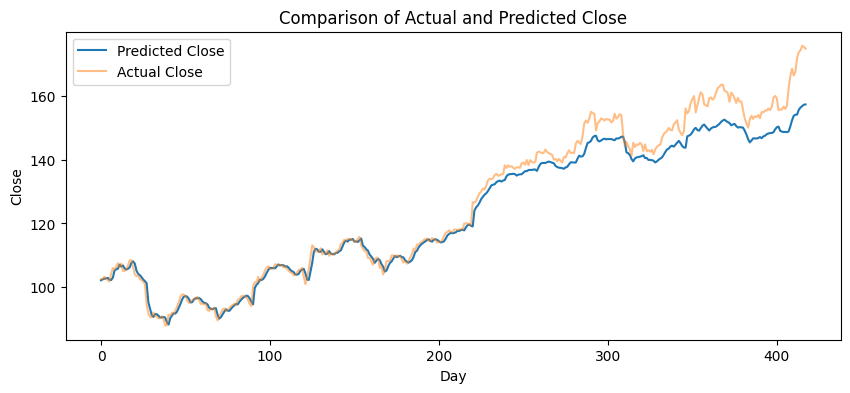

In [289]:

# Create separate plots for each feature.
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(10, 4))
    plt.plot(test_predictions[:, i], label=f'Predicted {feature}')
    plt.plot(new_y_test[:, i], label=f'Actual {feature}', alpha=0.5)
    plt.title(f'Comparison of Actual and Predicted {feature}')
    plt.xlabel('Day')
    plt.ylabel(feature)
    plt.legend()
    plt.show()


## **Acknowledgement**

Parts of this project are adapted from Greg Hogg's LTSM neural network. Significant changes were made to alter the number of features used and improve accuracy